In [ ]:
! pip install -q kaggle

In [ ]:
!python --version

Python 3.7.10


In [ ]:
%tensorflow_version 2.1.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
import tensorflow

print(tensorflow.__version__)

2.4.1


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arkaprabha1012","key":"f07b1a3ffd2b86f82a0788e5e9dc8dfe"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-13 10:04:34            314  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            362  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            279  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            133  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [2]:
#!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
#!wget https://www.dropbox.com/s/il6smb77d9m8hmi/Dataset.zip?dl=0
#!wget https://www.dropbox.com/s/9jl6axf8851185t/Original.zip?dl=0
#kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!wget https://www.dropbox.com/s/ocogoroxxds99mg/claheplussharpening.zip?dl=0

/content/gdrive/MyDrive/ALLISI/clahe.zip: Scheme missing.


In [3]:
#!unzip covid19-radiography-database.zip
#!unzip /content/Dataset.zip?dl=0
#!unzip /content/gdrive/MyDrive/ALLISI/claheplussharpening.zip
#!unzip /content/gdrive/MyDrive/DatasetOriginalupdated.zip
!unzip /content/gdrive/MyDrive/ALLISI/clahe.zip

Streaming output truncated to the last 5000 lines.
  inflating: clahe/Pneumoniaclahe/254f04d1-d24e-43bc-a00d-8f7140c222fb.png  
  inflating: clahe/Pneumoniaclahe/66412414-434a-4a66-97e3-68bf804d8a4a.png  
  inflating: clahe/Pneumoniaclahe/7ef47be2-106c-41d5-aa52-7c14a0fb82a1.png  
  inflating: clahe/Pneumoniaclahe/b7b51f82-2aa9-4375-a84f-25c52eeb0b40.png  
  inflating: clahe/Pneumoniaclahe/336622cd-55bc-4404-beb1-8c75de224d0a.png  
  inflating: clahe/Pneumoniaclahe/Viral Pneumonia-509.png  
  inflating: clahe/Pneumoniaclahe/0f639fad-780e-44f8-ba8d-0c934bdca870.png  
  inflating: clahe/Pneumoniaclahe/Viral Pneumonia-150.png  
  inflating: clahe/Pneumoniaclahe/Viral Pneumonia-391.png  
  inflating: clahe/Pneumoniaclahe/407bc983-cb9f-4559-9e82-8b559e466042.png  
  inflating: clahe/Pneumoniaclahe/Viral Pneumonia-975.png  
  inflating: clahe/Pneumoniaclahe/Viral Pneumonia-101.png  
  inflating: clahe/Pneumoniaclahe/Viral Pneumonia-36.png  
  inflating: clahe/Pneumoniaclahe/755c7169-e84a-432

In [4]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
pip install split-folders tqdm

In [ ]:
!rm "/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx"
!rm "/content/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx"
!rm "/content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx"
!rm "/content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
!rm "/content/COVID-19_Radiography_Dataset/README.md.txt"

rm: cannot remove '/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx': No such file or directory
rm: cannot remove '/content/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx': No such file or directory
rm: cannot remove '/content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx': No such file or directory
rm: cannot remove '/content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx': No such file or directory
rm: cannot remove '/content/COVID-19_Radiography_Dataset/README.md.txt': No such file or directory


In [ ]:
!rmdir "/content/COVID-19_Radiography_Dataset/.ipynb_checkpoints"
!rmdir "/content/COVID-19_Radiography_Dataset/.ipynb_checkpoints" #active it when working with kaggle dataset

rmdir: failed to remove '/content/COVID-19_Radiography_Dataset/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/COVID-19_Radiography_Dataset/.ipynb_checkpoints': No such file or directory


In [6]:
import splitfolders  # or import split_folders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

splitfolders.ratio("/content/clahe", output="Output", seed=1337, ratio=(.6,.2,.2), group_prefix=None) # default values
# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed("/content/susmitadipluskaggle", output="Output", seed=1337, fixed=(70,70), oversample=False, group_prefix=None) # default values

Copying files: 27790 files [00:05, 5130.18 files/s]


In [ ]:
'''from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
print(kf)
for train_index,test_index in kf.split()'''

'from sklearn.model_selection import KFold\nkf=KFold(n_splits=3)\nprint(kf)\nfor train_index,test_index in kf.split()'

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 
#claheimbalanceddata stored in basuarkaprabha1012

Mounted at /content/gdrive


In [19]:
!zip -r /content/gdrive/MyDrive/TOTALclahebalanced.zip /content/Output
#!unzip /content/gdrive/MyDrive/Preprocessed.zip

Streaming output truncated to the last 5000 lines.
  adding: content/Output/train/Normalclahe/Normal-967.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-85.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-120.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-3666.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-829.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-3699.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-358.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-2597.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-3143.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-107.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-3577.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-966.png (deflated 0%)
  adding: content/Output/train/Normalclahe/Normal-3808.png (deflated 0%)
  adding

In [ ]:
#from google.colab import files
#files.download("/content/folder.zip")

In [ ]:
kf = KFold(n_splits = 5)

In [7]:
img_height,img_width=(224,224)
batch_size=128
train_data_dir="/content/Output/train"
valid_data_dir="/content/Output/val"
!rmdir "/content/Output/train/.ipynb_checkpoints/"
!rmdir "/content/Output/val/.ipynb_checkpoints/"
test_data_dir="/content/Output/test"

rmdir: failed to remove '/content/Output/train/.ipynb_checkpoints/': No such file or directory
rmdir: failed to remove '/content/Output/val/.ipynb_checkpoints/': No such file or directory


In [8]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle='False')
valid_generator=train_datagen.flow_from_directory(valid_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle='False')
'''test_generator=train_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')
'''
print(valid_generator.class_indices)
print(train_generator.class_indices)
#print(test_generator.class_indices)

Found 16673 images belonging to 4 classes.
Found 5556 images belonging to 4 classes.
{'Covidclahe': 0, 'Lungclahe': 1, 'Normalclahe': 2, 'Pneumoniaclahe': 3}
{'Covidclahe': 0, 'Lungclahe': 1, 'Normalclahe': 2, 'Pneumoniaclahe': 3}


In [ ]:
'''from keras.models import load_model
new_model=load_model('/content/gdrive/MyDrive/ALLISI/6020clahesharpen.h5')'''


In [ ]:
'''results=new_model.evaluate_generator(valid_generator,steps=16)
print("validation accuracy:",results)'''

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


validation accuracy: [0.27158915996551514, 0.89990234375]


In [9]:
#new model for resnet
base_model=ResNet50(include_top=False,
                    weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(train_generator.num_classes,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=predictions)
for layer in base_model.layers:
  layer.trainable=False
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
'''from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/ALLISI/clahesharpTOTAL50dataResnset.h5')'''

In [10]:
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
130/130 [==============================] - 282s 2s/step - loss: 1.6048 - accuracy: 0.6418 - val_loss: 0.3916 - val_accuracy: 0.8586

Epoch 00001: val_accuracy improved from -inf to 0.85865, saving model to weights-improvement-01-0.86.hdf5
Epoch 2/50
130/130 [==============================] - 246s 2s/step - loss: 0.4065 - accuracy: 0.8507 - val_loss: 0.3280 - val_accuracy: 0.8870

Epoch 00002: val_accuracy improved from 0.85865 to 0.88699, saving model to weights-improvement-02-0.89.hdf5
Epoch 3/50
130/130 [==============================] - 246s 2s/step - loss: 0.3213 - accuracy: 0.8833 - val_loss: 0.3003 - val_accuracy: 0.8892

Epoch 00003: val_accuracy improved from 0.88699 to 0.88917, saving model to weights-improvement-03-0.89.hdf5
Epoch 4/50
130/130 [==============================] - 246s 2s/step - loss: 0.2972 - accuracy: 0.8941 - val_loss: 0.3379 - val_accuracy: 0.8746

Epoch 00004: val_accuracy did not improve from 0.88917
Epoch 5/50
130/130 [=========================

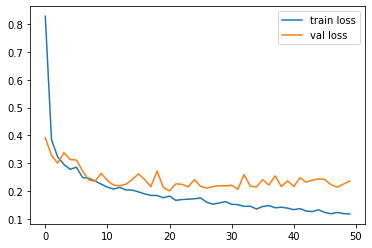

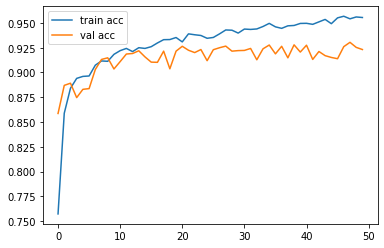

<Figure size 432x288 with 0 Axes>

In [11]:
'''r = model.fit_generator(
  train_generator,
  epochs=10,
  steps_per_epoch=len(valid_generator),
  validation_data=valid_generator,
  validation_steps=len(valid_generator),
  callbacks=callbacks_list
)'''
#for new loaded model use new_model unless model
r = model.fit_generator(
  train_generator,
  epochs=50,
  steps_per_epoch=16673//(batch_size),
  validation_data=valid_generator,
  validation_steps=5556//(batch_size),
  callbacks=callbacks_list
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
test_generator=train_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle='False'
                                                  )
print(test_generator.class_indices)


Found 5561 images belonging to 4 classes.


In [17]:
print(test_generator.class_indices)

{'Covidclahe': 0, 'Lungclahe': 1, 'Normalclahe': 2, 'Pneumoniaclahe': 3}


In [13]:
model.save("imbalacedmainclaheTOTALdataResnset.h5")

In [14]:
print(test_generator.labels)

[0 0 0 ... 3 3 3]


In [15]:
#print(y_pred)

In [ ]:
#To load a new model
'''from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/ALLISI/clahesharpTOTAL50dataResnset.h5')'''

In [15]:
test_loss,test_acc=model.evaluate(test_generator,verbose=1)
print("Test accuracy:",test_acc)
print("Test Loss:",test_loss)
test_generator.shuffle=False
test_generator.reset()
Y_pred = model.predict_generator(test_generator,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Covidclahe','Lungclahe','Normalclahe','Pneumoniaclahe']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

44/44 [==============================] - 65s 1s/step - loss: 0.2402 - accuracy: 0.9220
Test accuracy: 0.921956479549408
Test Loss: 0.24021069705486298


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


44/44 [==============================] - 62s 1s/step
Confusion Matrix
[[121 203 302 213]
 [158 274 430 341]
 [278 444 742 575]
 [195 345 542 398]]
Classification Report
                precision    recall  f1-score   support

    Covidclahe       0.16      0.14      0.15       839
     Lungclahe       0.22      0.23      0.22      1203
   Normalclahe       0.37      0.36      0.37      2039
Pneumoniaclahe       0.26      0.27      0.26      1480

      accuracy                           0.28      5561
     macro avg       0.25      0.25      0.25      5561
  weighted avg       0.28      0.28      0.28      5561



In [18]:
Y_pred = model.predict_generator(test_generator,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Covidclahe','Lungclahe','Normalclahe','Pneumoniaclahe']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
cm=confusion_matrix(test_generator.classes, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


44/44 [==============================] - 62s 1s/step
Confusion Matrix
[[ 734   27   51   27]
 [   6 1082  106    9]
 [  11  130 1879   19]
 [   5    4    4 1467]]
Classification Report
                precision    recall  f1-score   support

    Covidclahe       0.97      0.87      0.92       839
     Lungclahe       0.87      0.90      0.88      1203
   Normalclahe       0.92      0.92      0.92      2039
Pneumoniaclahe       0.96      0.99      0.98      1480

      accuracy                           0.93      5561
     macro avg       0.93      0.92      0.93      5561
  weighted avg       0.93      0.93      0.93      5561



In [19]:
print(cm.diagonal())

[0.87485101 0.89941812 0.92153016 0.99121622]


In [25]:
#metrices based on class imbalance
acsa = (cm[0,0]/sum(cm[0,:])+cm[1,1]/sum(cm[1,:])+cm[2,2]/sum(cm[2,:]))/3
print(acsa)
class_acc = [cm[i,i]/np.sum(cm[i,:]) if np.sum(cm[i,:]) else 0 for i in range(len(cm))]
print(class_acc)
ppvs = [cm[i,i]/np.sum(cm[:,i]) if np.sum(cm[:,i]) else 0 for i in range(len(cm))]
print(ppvs)

0.898599765439382
[0.8748510131108463, 0.8994181213632585, 0.9215301618440412, 0.9912162162162163]
[0.9845143716299473, 0.9011675257770567, 0.8587290992900128, 0.9529120355991169]


In [ ]:
pred= model.predict_generator(test_generator,2000//(batch_size*2))
predicted_class_indices=np.argmax(pred,axis=1)
labels=(test_generator.class_indices)

labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print(labels)
print(predictions)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[2 2 2 ... 2 1 3]
{'Covidclahe': 0, 'Lungclahe': 1, 'Normalclahe': 2, 'Pneumoniaclahe': 3}
['Normalclahe', 'Normalclahe', 'Normalclahe', 'Normalclahe', 'Pneumoniaclahe', 'Normalclahe', 'Covidclahe', 'Pneumoniaclahe', 'Covidclahe', 'Normalclahe', 'Pneumoniaclahe', 'Normalclahe', 'Covidclahe', 'Covidclahe', 'Normalclahe', 'Covidclahe', 'Normalclahe', 'Covidclahe', 'Pneumoniaclahe', 'Lungclahe', 'Normalclahe', 'Normalclahe', 'Pneumoniaclahe', 'Covidclahe', 'Pneumoniaclahe', 'Normalclahe', 'Pneumoniaclahe', 'Lungclahe', 'Pneumoniaclahe', 'Covidclahe', 'Pneumoniaclahe', 'Normalclahe', 'Normalclahe', 'Normalclahe', 'Covidclahe', 'Lungclahe', 'Covidclahe', 'Pneumoniaclahe', 'Covidclahe', 'Pneumoniaclahe', 'Lungclahe', 'Covidclahe', 'Pneumoniaclahe', 'Normalclahe', 'Lungclahe', 'Normalclahe', 'Lungclahe', 'Normalclahe', 'Normalclahe', 'Covidclahe', 'Pneumoniaclahe', 'Normalclahe', 'Pneumoniaclahe', 'Pneumoniaclahe', 'Pneumoniaclahe', 'Normalclahe', 'Normalclahe', 'Normalclahe', 'Normalclahe', 

ValueError: ignored

In [ ]:
'''steps = 100
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
predictions = model.predict_generator(test_generator, steps=steps)
val_preds = np.argmax(predictions, axis=-1)
val_trues = validation_generator.classes
cm = metrics.confusion_matrix(val_trues, val_preds)
labels = validation_generator.class_indices.keys()
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(val_trues, val_preds, labels=labels)
print(precision,recall,f1_score)'''

In [ ]:
'''from sklearn.metrics import classification_report, confusion_matrix
#from tensorflow import keras
#model = keras.models.load_model('/content/gdrive/MyDrive/TOTALdataResnset.h5')
Y_pred = model.predict_generator(valid_generator,2000//(batch_size))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes,y_pred))
print('Classification Report')
target_names = ['COVID','Lung_Opacity','Normal','ViralPneumonia']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))
#FOR VERSION 1 TRAINABLE'''

"from sklearn.metrics import classification_report, confusion_matrix\n#from tensorflow import keras\n#model = keras.models.load_model('/content/gdrive/MyDrive/TOTALdataResnset.h5')\nY_pred = model.predict_generator(valid_generator,2000//(batch_size))\ny_pred = np.argmax(Y_pred, axis=1)\nprint('Confusion Matrix')\nprint(confusion_matrix(valid_generator.classes,y_pred))\nprint('Classification Report')\ntarget_names = ['COVID','Lung_Opacity','Normal','ViralPneumonia']\nprint(classification_report(valid_generator.classes, y_pred, target_names=target_names))\n#FOR VERSION 1 TRAINABLE"

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import keras
from tensorflow.keras import utils
# We need not to create and train the model again
# No need to train the model, its a pre defined trained model
model = load_model("/content/resenet50medicaloriginal97percent656.h5")
#model.compile(optimizer='adam', loss='b_crossentropy', metrics=['accuracy'])

# Testing the Normal Image
image = cv2.imread("/content/wong-0005.jpg")
# image = cv2.imread("covid19dataset/test/covid/nejmoa2001191_f3-PA.jpeg")    # 0
image = cv2.resize(image, (128, 128))
image = np.reshape(image, [1, 128, 128, 3])
classes = model.predict(image)
result=np.argmax(classes)
if result==0:
  print("COVID")
elif result==1:
  print("NORMAL")
else:
  print("PNEUMONIA")

COVID


In [18]:
import shutil
shutil.move("/content/imbalacedmainclaheTOTALdataResnset.h5", "/content/gdrive/MyDrive")

'/content/gdrive/MyDrive/balacedmainclaheTOTALdataResnset.h5'

In [ ]:
pip install pillow01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg

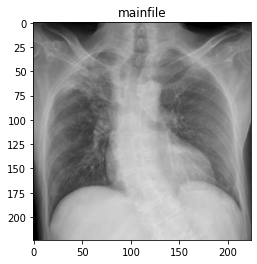

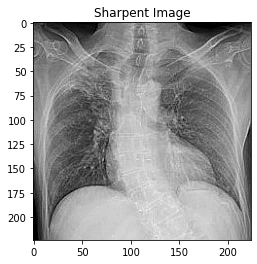

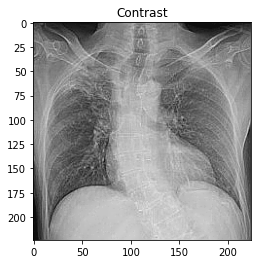

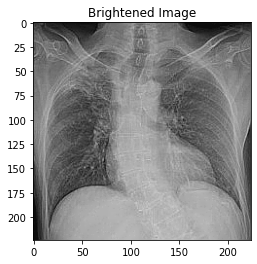

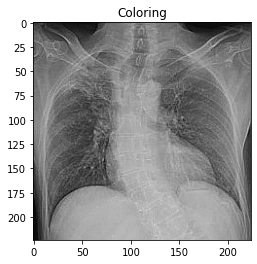

In [ ]:
#IMAGE ENHANCEMENT
import matplotlib.pyplot as plt
from PIL import Image,ImageEnhance
filename="/content/000012-3.jpg"
image=Image.open(filename)
plt.title("mainfile")
plt.imshow(image,'gray')
plt.show()
size=width,height=image.size
enhancer=ImageEnhance.Sharpness(image)
image=enhancer.enhance(7.0)
plt.title("Sharpent Image")
plt.imshow(image,'gray')
plt.show()
enhancer=ImageEnhance.Contrast(image)
image=enhancer.enhance(0.9)
plt.title("Contrast")
plt.imshow(image,'gray')
plt.show()
enhancer=ImageEnhance.Brightness(image)
image=enhancer.enhance(0.9)
plt.title("Brightened Image")
plt.imshow(image,'gray')
plt.show()
enhancer=ImageEnhance.Color(image)
image=enhancer.enhance(0.9)
plt.title("Coloring")
plt.imshow(image,'gray')
plt.show()

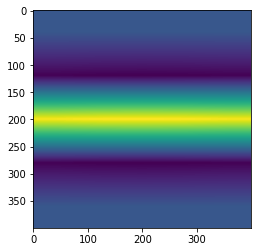

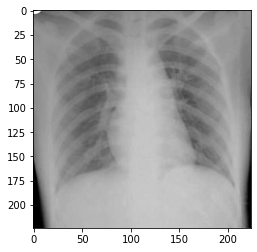

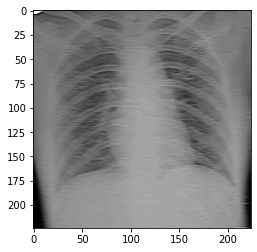

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ksize = 5  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 1 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/2  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi /2  #1/4 works best for angled. 
gamma=0.1  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  #Phase offset. I leave it to 0. 


kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)


img = cv2.imread('/content/gr1_lrg-b.jpg')
#img = cv2.imread('BSE_Image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))                    # Resize image
plt.imshow(kernel_resized)
plt.show()
plt.imshow(img,'gray')
plt.show()
plt.imshow(fimg,'gray')
plt.show()

GRADIENT VISUALISATION

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import imutils
import cv2

In [ ]:
from keras.models import load_model
model=load_model("/content/gdrive/MyDrive/ALLISI/retraining204040kaggleupdated.h5")

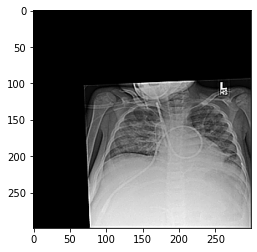

In [ ]:
orig=cv2.imread("/content/Lung_Opacity-812.png")
plt.imshow(orig)
plt.show()
resized=cv2.resize(orig,(224,224))


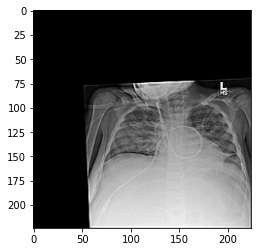

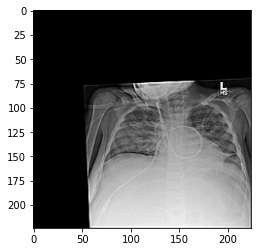

In [ ]:
import matplotlib.pyplot as plt
image=resized
image1=image.copy()
plt.imshow(image)
plt.show()
plt.imshow(image,"gray")
plt.show()
image=img_to_array(image)
image=np.expand_dims(image,axis=0)

In [ ]:
preds=model.predict(image)
i=np.argmax(preds[0])
print(i)
if i==0:
  decision="Covid"
elif i==1:
  decision="Lung Opacity"
elif i==2:
  decision="Normal"
else:
  decision="Pneumonia"
print(decision)

1
Lung Opacity


In [ ]:
def decode_predictions(preds, top=1, class_list_path=None):
    import json
    if len(preds.shape) !=2:
        raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
    #CLASS_INDEX = json.load(open(class_list_path))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result =pred[i]
        #result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

In [ ]:
# decode the ImageNet predictions to obtain the human-readable label
decoded = decode_predictions(preds,top=1,class_list_path=None)
decoded=decoded[0]*100
print(decision,":",decoded)

Lung Opacity : 43.25364828109741


In [ ]:
class gradcam:
  def __init__(self,model,classIdx,layername=None):
    self.model=model
    self.classIdx=classIdx
    self.layername=layername
    if self.layername is None:
      self.layername=self.find_target_layer()
  def find_target_layer(self):
    for layer in reversed(self.model.layers):
      if len(layer.output.shape)==4:
        return layer.name
    raise ValueError("COuld not find 4d layer")
  def compute_heatmap(self,image,eps=1e-8):
    gradModel=Model(inputs=[self.model.inputs],outputs=[self.model.get_layer(self.layername).output, self.model.output])
    with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
      inputs = tf.cast(image, tf.float32)
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, self.classIdx]
    grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
    (w, h) = (image.shape[2], image.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
    return heatmap

  def overlay_heatmap(self, heatmap, image, alpha=0.5,colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
    heatmap = cv2.applyColorMap(heatmap, colormap)
    output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
    return (heatmap, output)

In [ ]:
cam = gradcam(model, i)
heatmap = cam.compute_heatmap(image)

In [ ]:
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

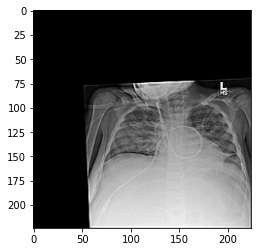

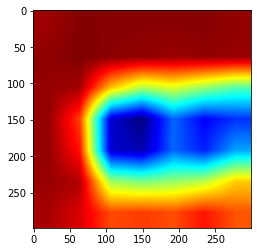

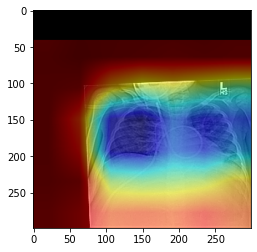

Lung Opacity : 43.25364828109741


In [ ]:
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
#cv2.putText(output,label=, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
import matplotlib.pyplot as plt

# display the original image and resulting heatmap and output image
# to our screen
#output = np.vstack([orig, heatmap, output])
#output = imutils.resize(output, height=700)
plt.imshow(image1)
plt.show()
plt.imshow(heatmap)
plt.show()
plt.imshow(output)
plt.show()
print(decision,":",decoded)